# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "bab9a3d1c4575fafc4915a63f3316348"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and len(cities) < 100:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

100

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base = {"City": [""], "Cloudiness": [""], "Country": [""], "Date": [""], "Humidity": [""], \
         "Lat": [""], "Lng": [""], "Max Temp": [""], "Wind Speed": [""]}
df = pd.DataFrame(base)

for city in cities:
    time.sleep(1.0001)
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bab9a3d1c4575fafc4915a63f3316348&q={city}"

    weather = requests.get(url)
    weather_js = weather.json()
    
    print(f"City: {city} ID: {weather}")
    
    if weather_js["cod"] != 200:
        continue
    
    cloudiness = weather_js["clouds"]["all"]
    country = weather_js["sys"]["country"]
    date = weather_js["dt"]
    humidity = weather_js["main"]["humidity"]
    lat = weather_js["coord"]["lat"]
    lng = weather_js["coord"]["lon"]
    maxtmp = weather_js["main"]["temp_max"]
    wind = weather_js["wind"]["speed"]

    d = {"City": [city], "Cloudiness": [cloudiness], "Country": [country], "Date": [date], "Humidity": [humidity], \
         "Lat": [lat], "Lng": [lng], "Max Temp": [maxtmp], "Wind Speed": [wind]}
    df2 = pd.DataFrame(d)
        
    df = df.append(df2)      

City: ormara ID: <Response [200]>
City: lockport ID: <Response [200]>
City: barrow ID: <Response [200]>
City: gitega ID: <Response [200]>
City: hilo ID: <Response [200]>
City: geraldton ID: <Response [200]>
City: dingle ID: <Response [200]>
City: bafra ID: <Response [200]>
City: sayyan ID: <Response [200]>
City: barentsburg ID: <Response [404]>
City: beyneu ID: <Response [200]>
City: bethel ID: <Response [200]>
City: hithadhoo ID: <Response [200]>
City: bac lieu ID: <Response [404]>
City: esperance ID: <Response [200]>
City: khatanga ID: <Response [200]>
City: hobart ID: <Response [200]>
City: fortuna ID: <Response [200]>
City: rikitea ID: <Response [200]>
City: la ronge ID: <Response [200]>
City: punta arenas ID: <Response [200]>
City: lorengau ID: <Response [200]>
City: formoso do araguaia ID: <Response [404]>
City: provideniya ID: <Response [200]>
City: castro ID: <Response [200]>
City: havre-saint-pierre ID: <Response [200]>
City: ribeira grande ID: <Response [200]>
City: saint-phi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# # conversion to DF done within the API loop above
df.reset_index(inplace = True, drop = True)
df = df.drop([0])
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ormara,0,PK,1573765132,53,25.21,64.64,76.55,6.73
2,lockport,40,CA,1573765133,63,50.09,-96.94,28.99,20.8
3,barrow,23,AR,1573765134,41,-38.31,-60.23,70.38,9.17
4,gitega,100,BI,1573765135,95,-3.43,29.93,60.04,2.51
5,hilo,20,US,1573765102,58,19.71,-155.08,84.2,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

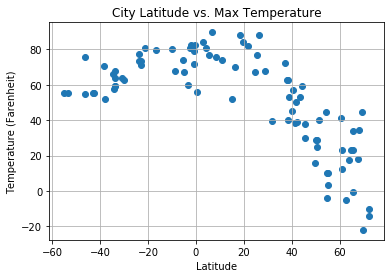

In [5]:
plt.scatter(df["Lat"], df["Max Temp"])

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.grid(True)

plt.savefig("latvstemp.png")

#### Latitude vs. Humidity Plot

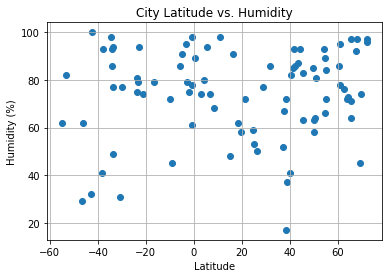

In [6]:
plt.scatter(df["Lat"], df["Humidity"])

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("latvshum.png")

#### Latitude vs. Cloudiness Plot

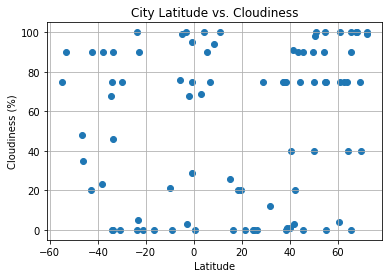

In [7]:
plt.scatter(df["Lat"], df["Cloudiness"])

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("latvscloud.png")

#### Latitude vs. Wind Speed Plot

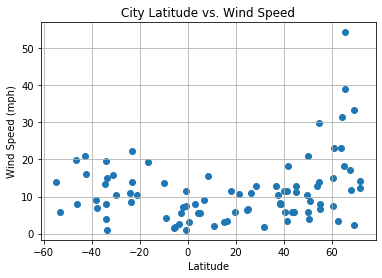

In [8]:
plt.scatter(df["Lat"], df["Wind Speed"])

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("latvswind.png")